In [1]:
# here i am going to do in sorted data by chatgpt as sorted data same as the level1

In [22]:
import pandas as pd 
import numpy as np 
import matplotlib as mpt

In [23]:
df = pd.read_csv('../../datasrc/NepseDataHistorical1997_2024_sorted.csv')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6088 entries, 0 to 6087
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SN          6088 non-null   int64  
 1   open        6088 non-null   object 
 2   high        6088 non-null   object 
 3   low         6088 non-null   object 
 4   close       6088 non-null   object 
 5   change      6088 non-null   float64
 6   pct_change  6088 non-null   float64
 7   turnover    6088 non-null   object 
 8   date        6088 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 428.2+ KB


In [25]:
# Remove the specified columns
df.drop(['SN', 'pct_change', 'change'], axis=1, inplace=True)

# Convert the 'open', 'high', 'low', 'close', and 'turnover' columns to numeric
# Assuming these columns contain comma as thousands separator and are in string format
numeric_columns = ['open', 'high', 'low', 'close', 'turnover']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col].str.replace(',', ''), errors='coerce')

# Convert the 'date' column to datetime format and set as index
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df.set_index('date', inplace=True)

# Convert 'turnover' column to integer after handling missing values
# We assume that the missing values can be safely replaced with 0
df['turnover'] = df['turnover'].fillna(0).astype(float)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6088 entries, 1997-01-09 to 2024-01-01
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   open      6088 non-null   float64
 1   high      6088 non-null   float64
 2   low       6088 non-null   float64
 3   close     6088 non-null   float64
 4   turnover  6088 non-null   float64
dtypes: float64(5)
memory usage: 285.4 KB


In [28]:
df.tail(1000)

,open,high,low,close,turnover
date,,,,,
2019-07-29,1252.72,1259.69,1252.72,1255.98,3.508126e+08
2019-07-30,1256.01,1262.16,1256.01,1259.37,2.943050e+08
2019-07-31,1259.53,1267.73,1257.91,1265.57,3.700020e+08
2019-08-01,1177.87,1180.85,1177.15,1177.07,3.326270e+08
2019-08-04,1183.46,1197.88,1179.47,1191.68,8.641430e+08
...,...,...,...,...,...
2023-12-21,2148.16,2154.19,2103.46,2109.10,6.274325e+09
2023-12-24,2113.68,2131.63,2083.58,2088.07,7.111734e+09
2023-12-27,2089.88,2107.74,2055.63,2070.84,5.248783e+09


In [32]:
df = df.sort_index()

In [33]:
df.head()

,open,high,low,close,turnover
date,,,,,
1997-01-09,170.13,170.13,170.13,170.13,0.0
1997-01-10,170.20,170.20,170.20,170.20,0.0
1997-01-12,171.77,171.77,171.77,171.77,0.0
1997-02-09,170.20,170.20,170.20,170.20,0.0
1997-02-12,171.19,171.19,171.19,171.19,0.0


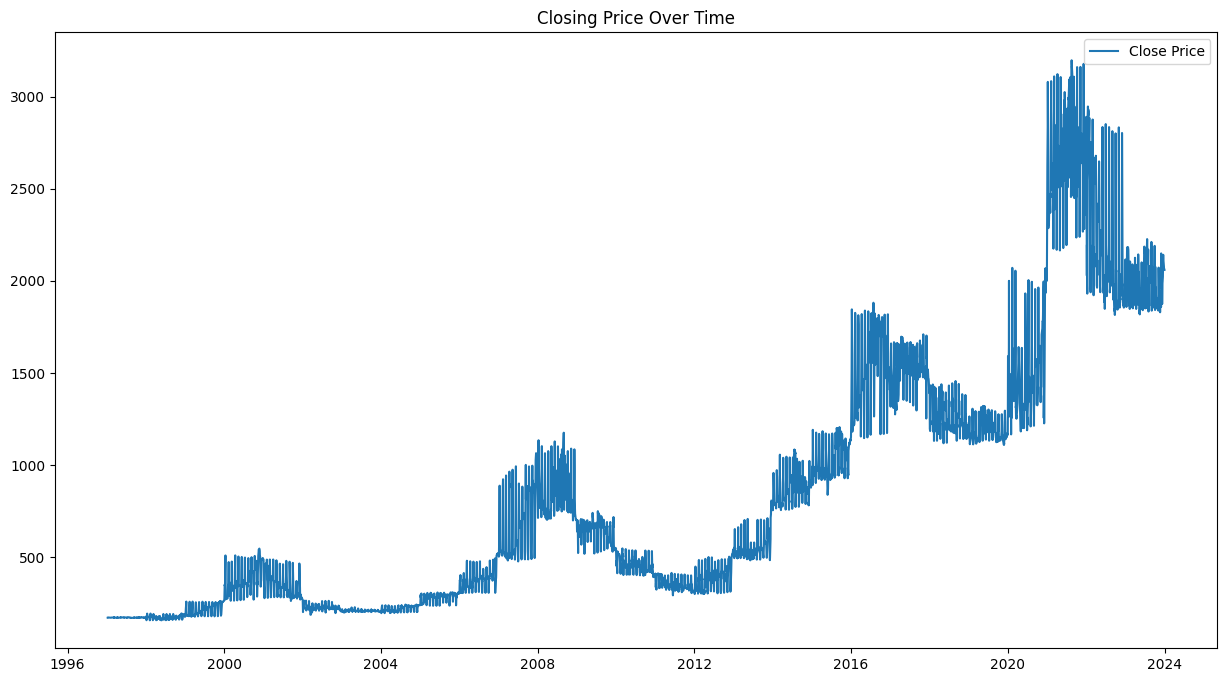

In [34]:
# importing the necessaries libraries 
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(15, 8))
plt.plot(df['close'], label='Close Price')
plt.title('Closing Price Over Time')
plt.legend()
plt.show()

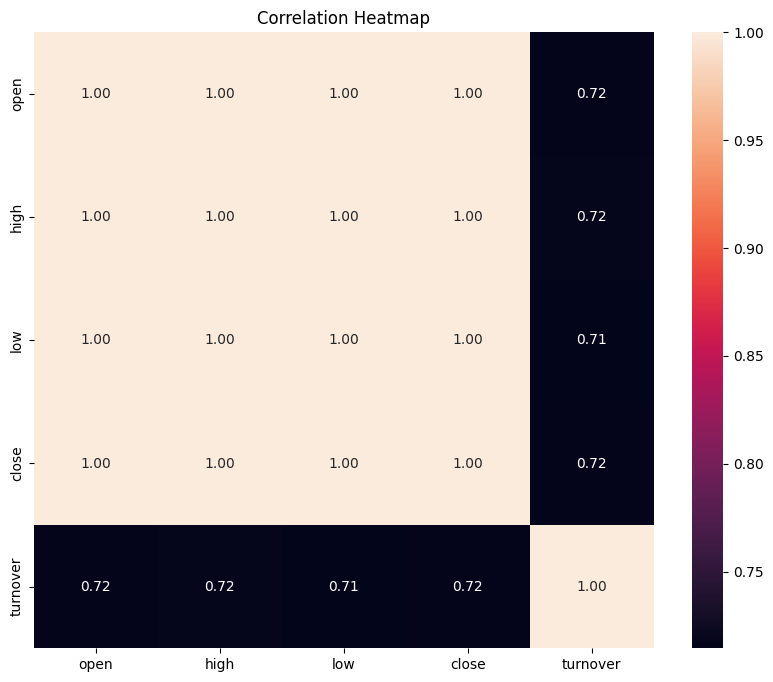

In [37]:
# Heatmap for correlations
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

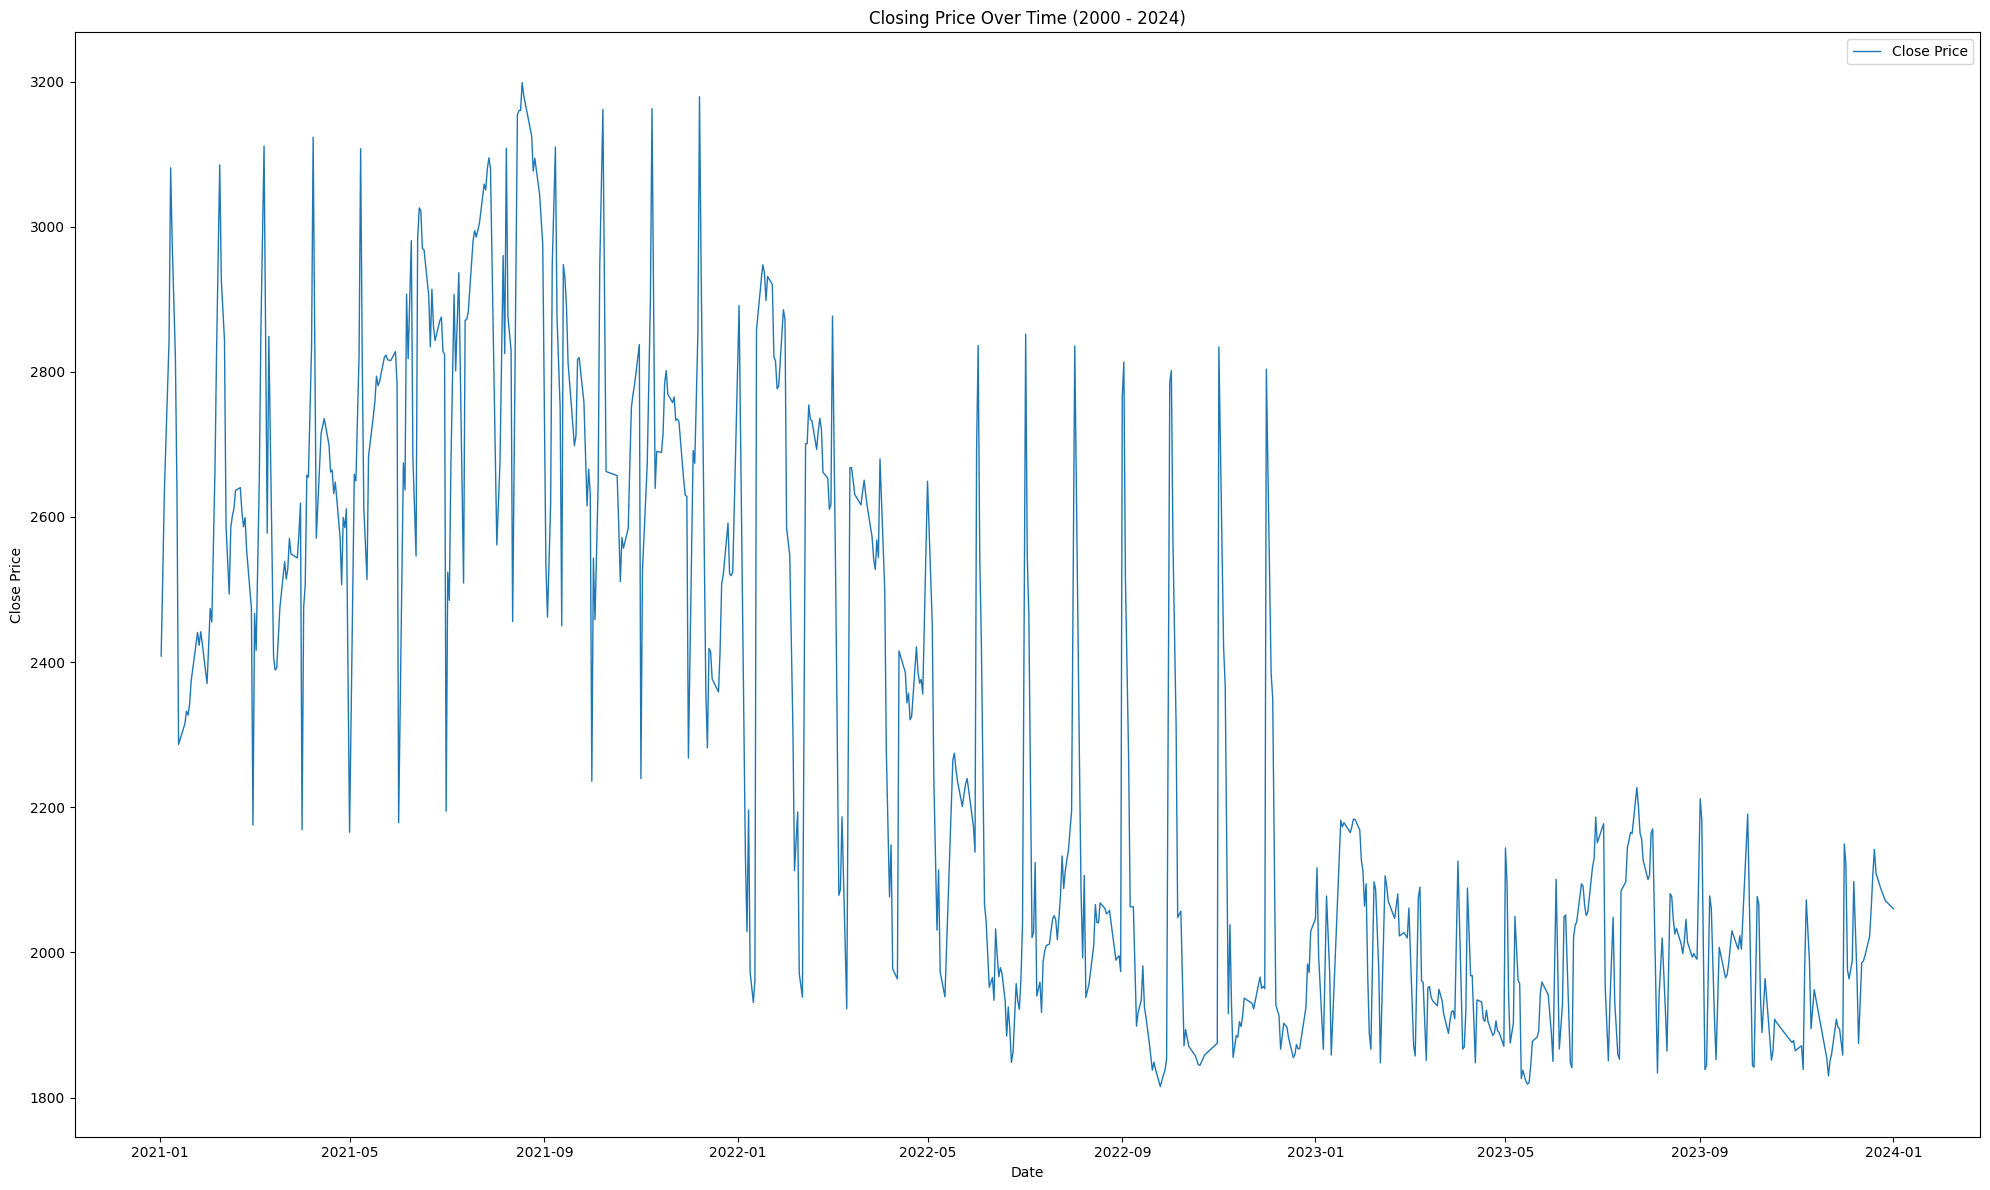

In [41]:
df_filtered = df.loc['2021-01-01':'2024-01-01']

# Plot the closing prices for the filtered date range
plt.figure(figsize=(20, 12))
plt.plot(df_filtered.index, df_filtered['close'], label='Close Price', linewidth=1)
plt.title('Closing Price Over Time (2000 - 2024)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.tight_layout()
plt.show()